In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.set_random_seed(42)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


We can see that we have 60 000 images 28x28 with one channel (gray images) in the training set and 10 000 in the test set. Example:

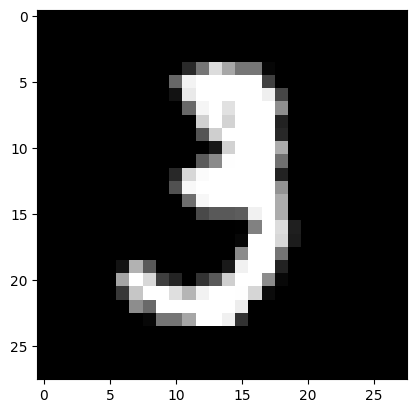

Example: 3


In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10], cmap='gray')
plt.show()
print(f"Example: {y_train[10]}")

To work better with the dataset let's normalize it and add a dimension to the arrays, that works as the number of channel:

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [5]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Reference Model

In [6]:
input_shape = (28,28,1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [7]:
batch_size = 128
epochs = 15

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)


Epoch 1/15


375/375 [==============================] - 6s 14ms/step - loss: 0.3896 - accuracy: 0.8861 - val_loss: 0.1061 - val_accuracy: 0.9691
Epoch 2/15
375/375 [==============================] - 5s 13ms/step - loss: 0.1214 - accuracy: 0.9626 - val_loss: 0.0788 - val_accuracy: 0.9772
Epoch 3/15
375/375 [==============================] - 5s 13ms/step - loss: 0.0894 - accuracy: 0.9723 - val_loss: 0.0567 - val_accuracy: 0.9838
Epoch 4/15
375/375 [==============================] - 5s 13ms/step - loss: 0.0750 - accuracy: 0.9765 - val_loss: 0.0540 - val_accuracy: 0.9853
Epoch 5/15
375/375 [==============================] - 5s 13ms/step - loss: 0.0663 - accuracy: 0.9796 - val_loss: 0.0463 - val_accuracy: 0.9860
Epoch 6/15
375/375 [==============================] - 5s 13ms/step - loss: 0.0567 - accuracy: 0.9822 - val_loss: 0.0445 - val_accuracy: 0.9871
Epoch 7/15
375/375 [==============================] - 5s 13ms/step - loss: 0.0564 - accuracy: 0.9833 - val_loss: 0.0403 - val_accuracy: 0.9

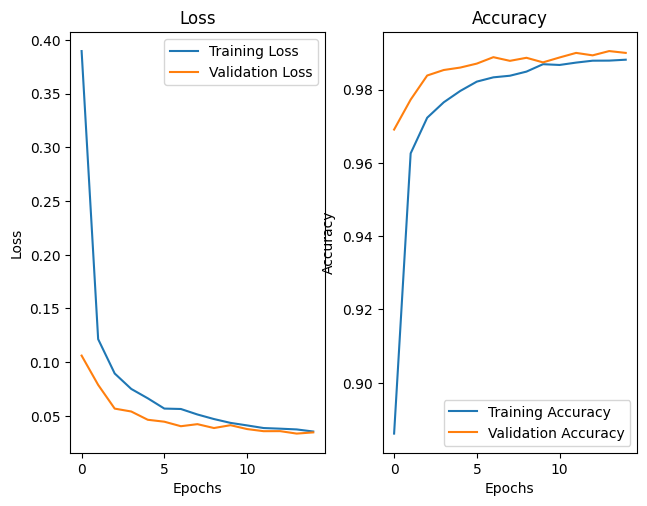

In [8]:
def plot_performance(history):
  fig, ax = plt.subplots(1,2)
  fig.tight_layout()
  train_acc = history.history['accuracy']
  train_loss = history.history['loss']
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Loss')
  ax[0].plot(train_loss, label='Training Loss')
  ax[0].plot(val_loss, label='Validation Loss')
  ax[0].legend()
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy')
  ax[1].set_title('Accuracy')
  ax[1].plot(train_acc, label='Training Accuracy')
  ax[1].plot(val_acc, label='Validation Accuracy')
  ax[1].legend()
  plt.show()

plot_performance(history)

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02606853097677231
Test accuracy: 0.9909999966621399


In [10]:
model_smallest = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        #layers.MaxPooling2D(pool_size=(28,28)),
        layers.AveragePooling2D(pool_size=(28,28)),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model_smallest.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d (Average  (None, 1, 1, 1)           0         
 Pooling2D)                                                      
                                                                 
 flatten_1 (Flatten)         (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model_smallest.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_smallest = model_smallest.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 1s 2ms/step - loss: 2.3010 - accuracy: 0.1275 - val_loss: 2.2989 - val_accuracy: 0.1526
Epoch 2/15
375/375 [==============================] - 1s 1ms/step - loss: 2.2960 - accuracy: 0.1506 - val_loss: 2.2948 - val_accuracy: 0.1424
Epoch 3/15
375/375 [==============================] - 1s 1ms/step - loss: 2.2918 - accuracy: 0.1619 - val_loss: 2.2909 - val_accuracy: 0.1472
Epoch 4/15
375/375 [==============================] - 1s 1ms/step - loss: 2.2877 - accuracy: 0.1643 - val_loss: 2.2868 - val_accuracy: 0.1599
Epoch 5/15
375/375 [==============================] - 1s 1ms/step - loss: 2.2837 - accuracy: 0.1744 - val_loss: 2.2831 - val_accuracy: 0.1626
Epoch 6/15
375/375 [==============================] - 1s 1ms/step - loss: 2.2798 - accuracy: 0.1738 - val_loss: 2.2793 - val_accuracy: 0.1705
Epoch 7/15
375/375 [==============================] - 1s 1ms/step - loss: 2.2760 - accuracy: 0.1792 - val_loss: 2.2756 - val_accuracy: 0.1744
Epoch 

In [12]:
score = model_smallest.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.2462403774261475
Test accuracy: 0.18639999628067017


# Models

For **Model 1**, the primary strategy was to reduce the number of filters in each convolutional layer and introduce a new pooling architecture. By adding a third convolutional layer and using AveragePooling2D instead of MaxPooling2D in the initial stages, the model aims to compensate for the reduced parameters while maintaining effective feature learning. 

In **Model 2**, parameter reduction was achieved by significantly lowering the number of filters and increasing network depth with a total of five convolutional layers. L1 regularization was introduced to reduce the risk of overfitting, making the network more robust despite the limited parameter count. Additionally, the inclusion of an intermediate dense layer enhances the model's representational power, supporting better classification despite the more compact architecture.

Epoch 1/15
375/375 [==============================] - 4s 8ms/step - loss: 0.8870 - accuracy: 0.7189 - val_loss: 0.3262 - val_accuracy: 0.9032
Epoch 2/15
375/375 [==============================] - 3s 7ms/step - loss: 0.2867 - accuracy: 0.9137 - val_loss: 0.2362 - val_accuracy: 0.9298
Epoch 3/15
375/375 [==============================] - 3s 7ms/step - loss: 0.2148 - accuracy: 0.9371 - val_loss: 0.1836 - val_accuracy: 0.9477
Epoch 4/15
375/375 [==============================] - 3s 7ms/step - loss: 0.1786 - accuracy: 0.9471 - val_loss: 0.1525 - val_accuracy: 0.9548
Epoch 5/15
375/375 [==============================] - 3s 7ms/step - loss: 0.1567 - accuracy: 0.9535 - val_loss: 0.1333 - val_accuracy: 0.9612
Epoch 6/15
375/375 [==============================] - 3s 7ms/step - loss: 0.1396 - accuracy: 0.9586 - val_loss: 0.1220 - val_accuracy: 0.9654
Epoch 7/15
375/375 [==============================] - 3s 7ms/step - loss: 0.1295 - accuracy: 0.9607 - val_loss: 0.1130 - val_accuracy: 0.9670
Epoch 

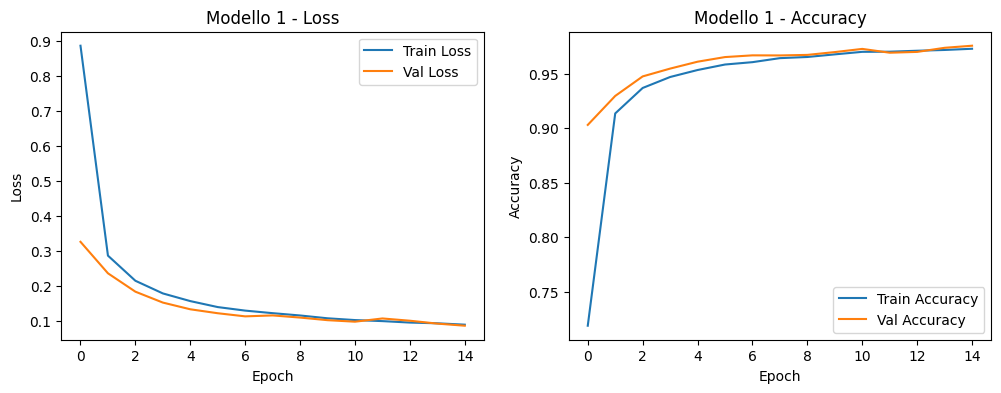

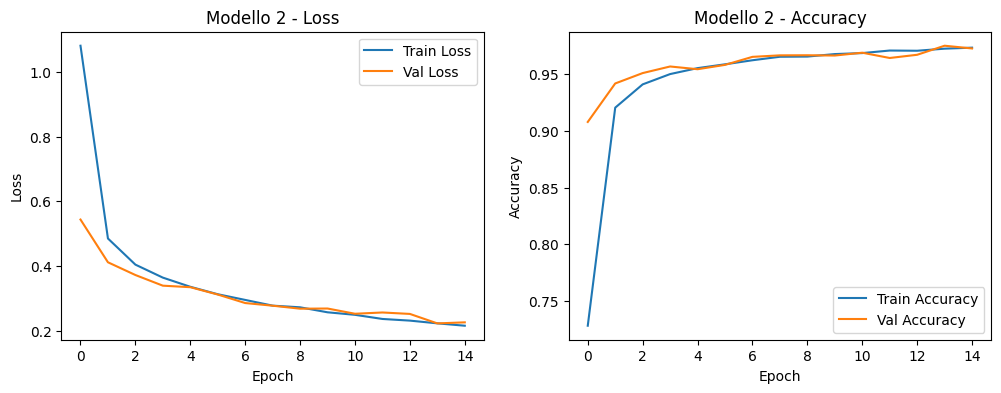

Modello 1 - Test loss: 0.08015821874141693
Modello 1 - Test accuracy: 0.9757999777793884
Modello 2 - Test loss: 0.21541811525821686
Modello 2 - Test accuracy: 0.973800003528595


In [ ]:
from tensorflow.keras import regularizers

def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))
    
    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

# Modello 1
model1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.Conv2D(22, kernel_size=(3,3), activation='relu'),
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)


model1.summary()

# Modello 2
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l1(0.001)),
        layers.Conv2D(8, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l1(0.001)),
        layers.MaxPooling2D(pool_size=(2,2)),
        
        layers.Conv2D(12, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l1(0.001)),
        layers.Conv2D(12, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l1(0.001)),
        layers.MaxPooling2D(pool_size=(2,2)),
        
        layers.Conv2D(32, kernel_size=(3,3), activation='relu', kernel_regularizer=regularizers.l1(0.001)),
        layers.MaxPooling2D(pool_size=(2,2)),
        
        layers.Flatten(),
        layers.Dense(10, activation="relu"),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

model2.summary()


plot_history(history1, 'Modello 1')
plot_history(history2, 'Modello 2')


score1 = model1.evaluate(x_test, y_test, verbose=0)
print('Modello 1 - Test loss:', score1[0])
print('Modello 1 - Test accuracy:', score1[1])

score2 = model2.evaluate(x_test, y_test, verbose=0)
print('Modello 2 - Test loss:', score2[0])
print('Modello 2 - Test accuracy:', score2[1])



**Conclusion**: The results show that different approaches to reducing model complexity can significantly impact performance. While both modified models performed well, the base model retained a slight advantage in accuracy and lower test loss, likely due to its greater parameter capacity and more extensive training time. However, Model 1 and Model 2 demonstrate that effective architectural adjustments, such as reducing filter counts and adding regularization, can still achieve competitive performance with fewer parameters, making them suitable for environments with limited computational resources and shorter training times.